<a href="https://colab.research.google.com/github/michhottinger/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/DS9_Michelle_Hottinger_Copy_of_LS_DS_111_Exploratory_Data_Analysis_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice Loading and Exploring Datasets

This assignment is purposely open-ended. You will be asked to load datasets from the [UC-Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). 

Even though you maybe using different datasets than your fellow classmates, try and be supportive and assist each other in the challenges that you are facing. You will only deepend your understanding of these topics as you work to assist one another. Many popular UCI datasets face similar data loading challenges.

Remember that the UCI datasets do not necessarily have a file type of `.csv` so it's important that you learn as much as you can about the dataset before you try and load it. See if you can look at the raw text of the file either locally or using the `!curl` shell command -or in some other way before you try and read it in as a dataframe. This will help you catch what would otherwise be unforseen problems.

Feel free to embellish this notebook with additional markdown cells,code cells, comments, graphs, etc. Whatever you think helps adequately address the questions.

## 1) Load a dataset from UCI (via its URL)

Please navigate to the home page and choose a dataset (other than the Adult dataset) from the "Most Popular" section on the right-hand side of the home page. Load the dataset via its URL and check the following (show your work):

- Are the headers showing up properly?
- Look at the first 5 and the last 5 rows, do they seem to be in order?
- Does the dataset have the correct number of rows and columns as described in the UCI page? 
 - Remember, that UCI does not count the y variable (column of values that we might want to predict via a machine learning model) as an "attribute" but rather as a "class attribute" so you may end up seeing a number of columns that is one greater than the number listed on the UCI website.
- Does UCI list this dataset as having missing values? Check for missing values and see if your analysis corroborates what UCI reports?
- if `NaN` values or other missing value indicators are not being detected by `df.isnull().sum()` find a way to replace whatever is indicating the missing values with `np.NaN`.
- Use the .describe() function in order to see the summary statistics of both the numeric and non-numeric columns. 

In [0]:
# TODO your work here!
# And note you should write comments, descriptions, and add new
# code and text blocks as needed


In [106]:
import pandas as pd
heart_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data'
heart = pd.read_csv(heart_url)
heart.shape
heart.dtypes


32      int64
1       int64
1.1     int64
95     object
0       int64
?      object
0.1    object
127    object
0.2    object
.7     object
1.2    object
?.1    object
?.2    object
1.3     int64
dtype: object

In [0]:
#to look at the dataset
#!curl https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data
  

In [107]:
#fix the headers. 

column_header = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
                 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

heart = pd.read_csv(heart_url, names=column_header)
heart.head(5)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,32,1,1,95,0,?,0,127,0,.7,1,?,?,1
1,34,1,4,115,0,?,?,154,0,.2,1,?,?,1
2,35,1,4,?,0,?,0,130,1,?,?,?,7,3
3,36,1,4,110,0,?,0,125,1,1,2,?,6,1
4,38,0,4,105,0,?,0,166,0,2.8,1,?,?,2


In [108]:
#heart.isnull()
#ran above code but ? were used here
import numpy as np
#replace the ?
df = heart.replace('?', np.NaN)
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,32,1,1,95,0,NaN,0,127,0,.7,1,NaN,NaN,1
1,34,1,4,115,0,NaN,NaN,154,0,.2,1,NaN,NaN,1
2,35,1,4,NaN,0,NaN,0,130,1,NaN,NaN,NaN,7,3
3,36,1,4,110,0,NaN,0,125,1,1,2,NaN,6,1
4,38,0,4,105,0,NaN,0,166,0,2.8,1,NaN,NaN,2


In [109]:
df.describe()


,age,sex,cp,chol,num
count,123.000000,123.000000,123.000000,123.0,123.000000
mean,55.317073,0.918699,3.699187,0.0,1.804878
std,9.032108,0.274414,0.688726,0.0,1.013503
min,32.000000,0.000000,1.000000,0.0,0.000000
25%,51.000000,1.000000,4.000000,0.0,1.000000
50%,56.000000,1.000000,4.000000,0.0,2.000000
75%,61.500000,1.000000,4.000000,0.0,3.000000
max,74.000000,1.000000,4.000000,0.0,4.000000


In [110]:
df.ffill(axis='rows')
df.bfill(axis='rows')
#hmmm didn't work?
#google how to replace Nan values
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,32,1,1,95,0,NaN,0,127,0,.7,1,NaN,NaN,1
1,34,1,4,115,0,NaN,NaN,154,0,.2,1,NaN,NaN,1
2,35,1,4,NaN,0,NaN,0,130,1,NaN,NaN,NaN,7,3
3,36,1,4,110,0,NaN,0,125,1,1,2,NaN,6,1
4,38,0,4,105,0,NaN,0,166,0,2.8,1,NaN,NaN,2


In [112]:
# TODO your work here!
# And note you should write comments, descriptions, and add new
# code and text blocks as needed

#This part is for storing the data on my local computer.
import pandas as pd
from google.colab import files
uploaded = files.upload() 

Saving wine.data to wine (2).data


In [0]:
#import the file into the dataframe:
import io
df1 = pd.read_csv(io.BytesIO(uploaded['wine.data']))

In [114]:
#check it out, see what if might look like
df1.shape
df1.head(5)
df1.dtypes

1          int64
14.23    float64
1.71     float64
2.43     float64
15.6     float64
127        int64
2.8      float64
3.06     float64
.28      float64
2.29     float64
5.64     float64
1.04     float64
3.92     float64
1065       int64
dtype: object

## 3) Make Crosstabs of the Categorical Variables

Take whichever of the above datasets has more categorical variables and use crosstabs to tabulate the different instances of the categorical variables.


In [115]:
# Your Code Here
import pandas as pd
pd.crosstab(df['age'], df['trestbps'])



trestbps,100,105,110,115,120,125,130,135,140,145,150,155,160,165,170,180,185,200,80,95
age,,,,,,,,,,,,,,,,,,,,
32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
34,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
36,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
38,1,1,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
41,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
42,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
43,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [116]:
pd.crosstab(df['age'], df['num'])


num,0,1,2,3,4
age,,,,,
32,0,1,0,0,0
34,0,1,0,0,0
35,0,0,0,1,0
36,0,1,0,0,0
38,1,3,2,0,0
40,0,0,1,0,0
41,0,0,1,0,0
42,0,1,1,0,0
43,0,0,1,1,1


## 4) Explore the distributions of the variables of the dataset using:
- Histograms
- Scatterplots
- Density Plots

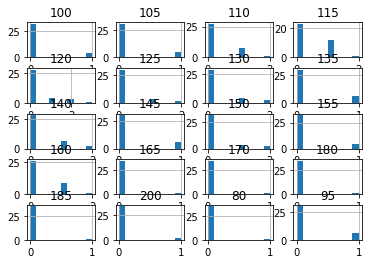

In [117]:
pd.crosstab(df['age'], df['trestbps']).hist();

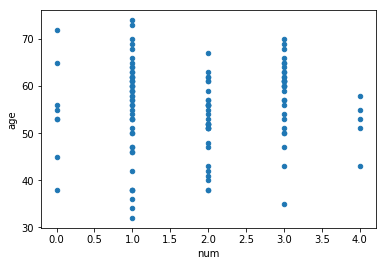

In [121]:
df.plot.scatter('num', 'age');

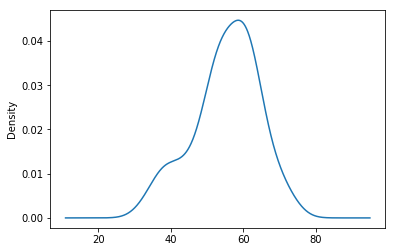

In [128]:
df['age'].plot.density();

## 5) Create at least one visualization from a crosstab:

Remember that a crosstab is just a dataframe and can be manipulated in the same way by row index, column, index, or column/row/cell position.


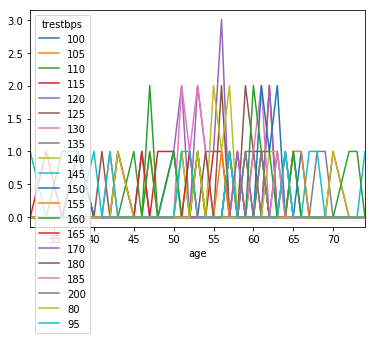

In [130]:
# Your Code Here
pd.crosstab(df['age'], df['trestbps']).plot();

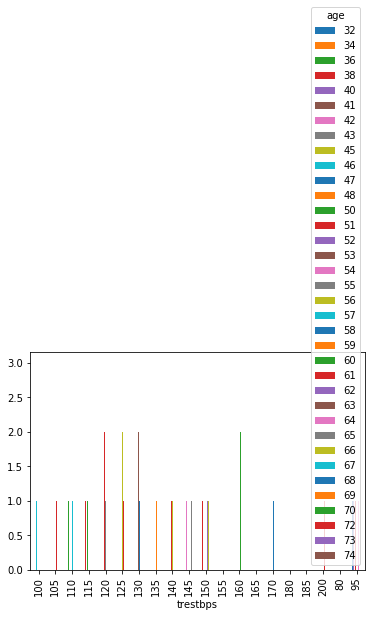

In [131]:
pd.crosstab(df['trestbps'], df['age']).plot(kind='bar');

## Stretch Goals 

The following additional study tasks are optional, they are intended to give you an opportunity to stretch yourself beyond the main requirements of the assignment. You can pick and choose from the below, you do not need to complete them in any particular order.

### - Practice Exploring other Datasets

### -  Try using the Seaborn plotting library's "Pairplot" functionality in order to explore all of the possible histograms and scatterplots of your dataset all at once:

[Seaborn Pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

### - Turn some of the continuous variables into categorical variables by binning the values using:
- [pd.cut()](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.cut.html)
- [pd.qcut()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)
- <https://stackoverflow.com/questions/30211923/what-is-the-difference-between-pandas-qcut-and-pandas-cut>

And then use crosstabs to compare/visualize these binned variables against the other variables.


### - Other types and sources of data
Not all data comes in a nice single file - for example, image classification involves handling lots of image files. You still will probably want labels for them, so you may have tabular data in addition to the image blobs - and the images may be reduced in resolution and even fit in a regular csv as a bunch of numbers.

If you're interested in natural language processing and analyzing text, that is another example where, while it can be put in a csv, you may end up loading much larger raw data and generating features that can then be thought of in a more standard tabular fashion.

Overall you will in the course of learning data science deal with loading data in a variety of ways. Another common way to get data is from a database - most modern applications are backed by one or more databases, which you can query to get data to analyze. We'll cover this more in our data engineering unit.

How does data get in the database? Most applications generate logs - text files with lots and lots of records of each use of the application. Databases are often populated based on these files, but in some situations you may directly analyze log files. The usual way to do this is with command line (Unix) tools - command lines are intimidating, so don't expect to learn them all at once, but depending on your interests it can be useful to practice.

One last major source of data is APIs: https://github.com/toddmotto/public-apis

API stands for Application Programming Interface, and while originally meant e.g. the way an application interfaced with the GUI or other aspects of an operating system, now it largely refers to online services that let you query and retrieve data. You can essentially think of most of them as "somebody else's database" - you have (usually limited) access.

*Stretch goal* - research one of the above extended forms of data/data loading. See if you can get a basic example working in a notebook. Image, text, or (public) APIs are probably more tractable - databases are interesting, but there aren't many publicly accessible and they require a great deal of setup.

ValueError: ignored

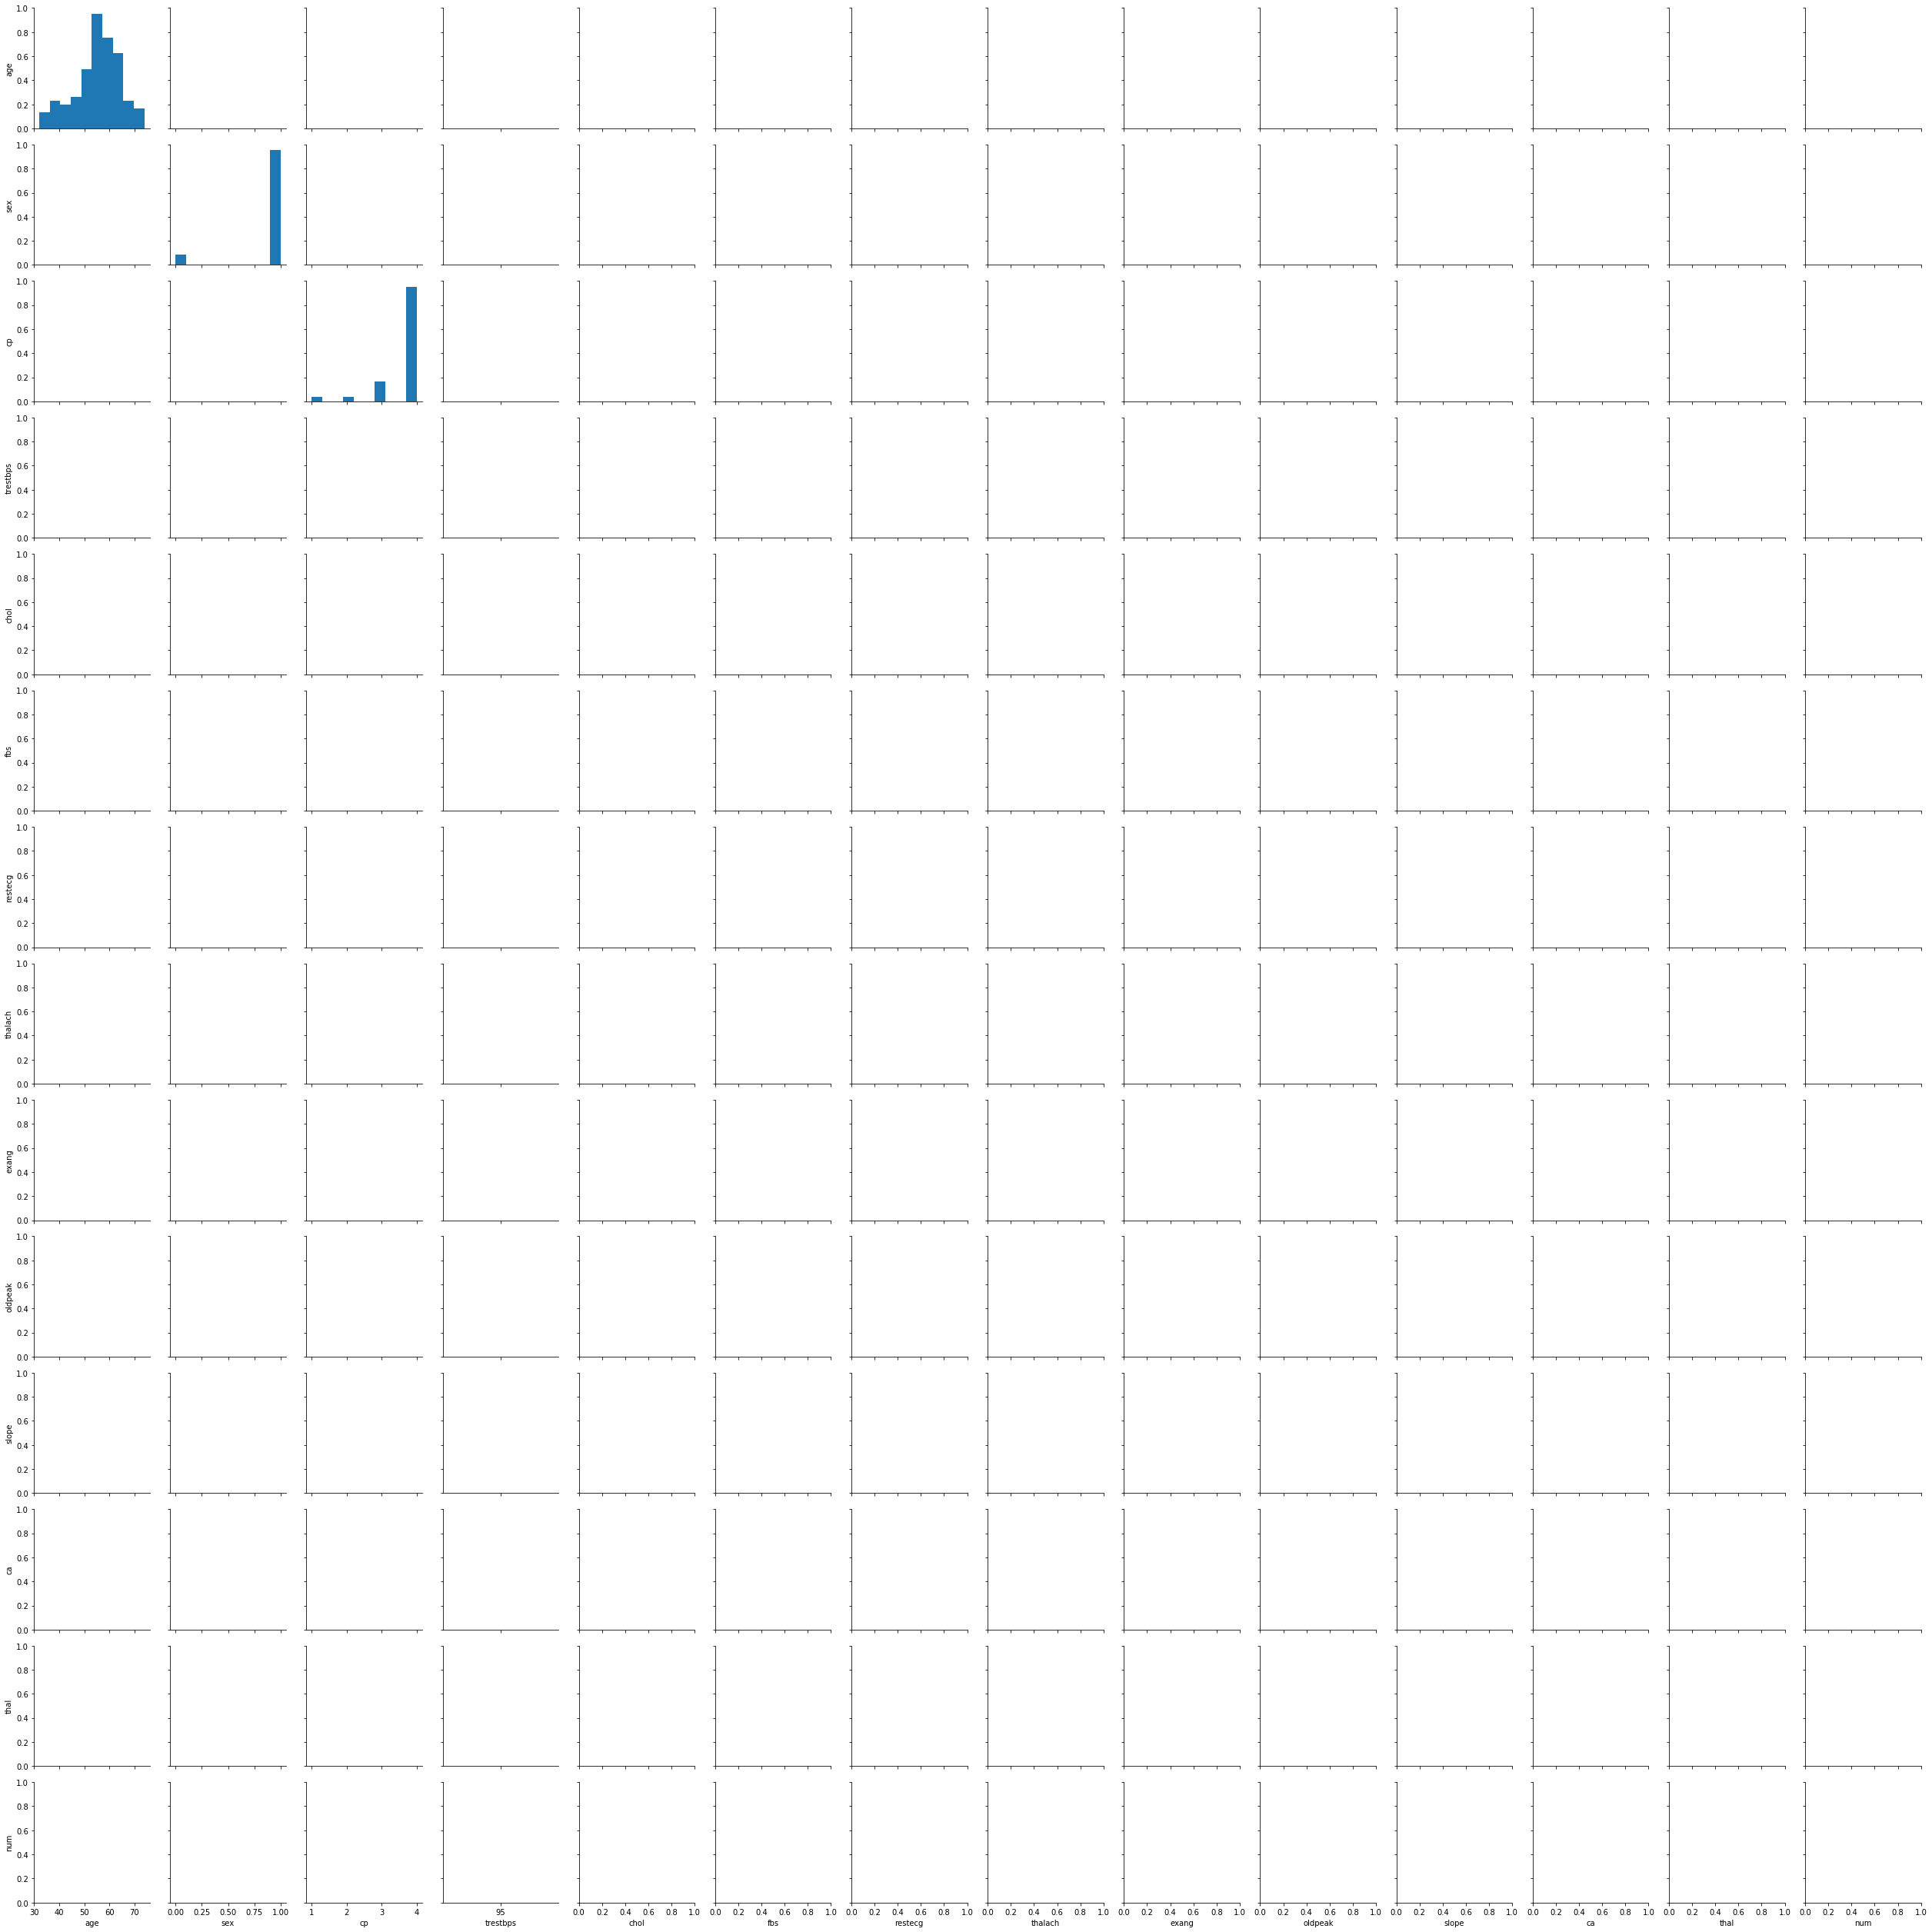

In [126]:
import seaborn as sns
sns.pairplot(df)